In [1]:
import os.path
os.chdir(os.path.expanduser("~/workspace/devjin24/python-playground"))
print("현재 작업 디렉토리:", os.getcwd())

현재 작업 디렉토리: /Users/ronaldo.c/workspace/devjin24/python-playground


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from src.mnist import *


dataset/mnist/train-images.idx3-ubyte (60000, 28, 28) Done
Done
dataset/mnist/train-labels.idx1-ubyte (60000,) Done
dataset/mnist/t10k-images.idx3-ubyte (10000, 28, 28) Done
Done
dataset/mnist/t10k-labels.idx1-ubyte (10000,) Done


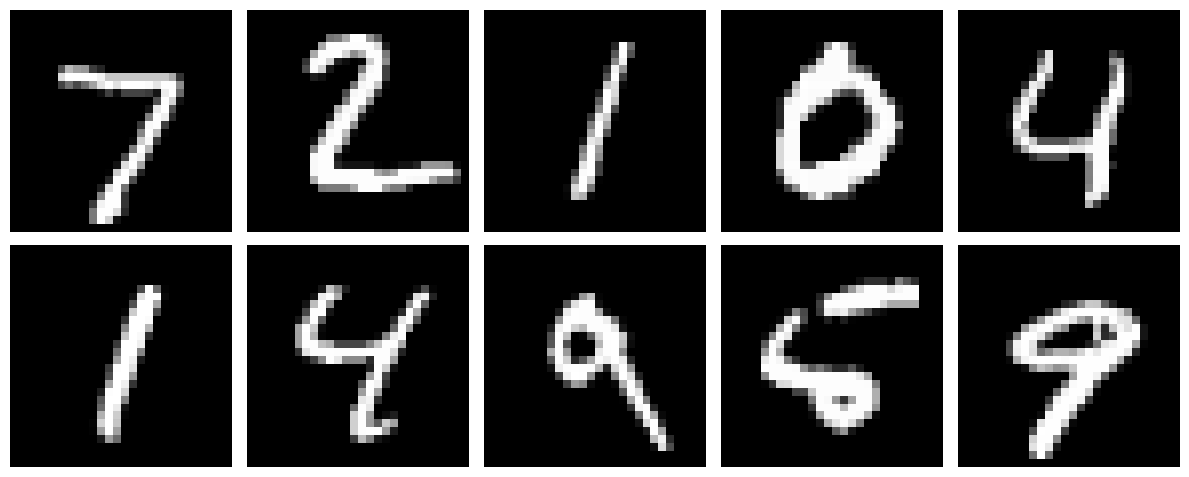

In [3]:
(train_img,train_label),(test_img,test_label) = load_mnist(flatten=False)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(test_img[i].reshape(28,28), cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [4]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(
        normalize=True, flatten=True, one_hot_label=False
    )
    return x_test, t_test


def init_network():
    with open("dataset/mnist/sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [8]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i].reshape(1, -1))
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

dataset/mnist/train-images.idx3-ubyte (60000, 28, 28) Done
Done
dataset/mnist/train-labels.idx1-ubyte (60000,) Done
dataset/mnist/t10k-images.idx3-ubyte (10000, 28, 28) Done
Done
dataset/mnist/t10k-labels.idx1-ubyte (10000,) Done
Accuracy:0.9352
